# Desafío Telecom X parte 2

## Objetivos del desafío
- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## Qué se pondrá en práctica
- Preprocesamiento de datos para Machine Learning
- Construcción y evaluación de modelos predictivos
- Interpretación de resultados y entrega de insights
- Comunicación técnica con enfoque estratégico

> **Nota:** Este notebook sigue el flujo típico de un proyecto de clasificación en Data Science, desde la exploración de datos hasta la evaluación y optimización de modelos. Se incluyen comentarios en las celdas clave para guiar al usuario.

# Eliminación de columnas irrelevantes

In [1418]:
import pandas as pd

> Importamos las librerías principales para manipulación de datos y visualización.

In [1419]:
datos = pd.read_csv('data/datos_tratados.csv')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,0,0,0,0,1,0,1,1,0,3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,0,1,0,0,0,0,0,0,1,2
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,0,0,0,0,0,1,0,0,0,1
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,0,0,0,0,1,1,0,1,1,4
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,0,0,0,0,0,0,1,1,0,2


In [1420]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   Churn                  7043 non-null   int64  
 2   gender                 7043 non-null   object 
 3   SeniorCitizen          7043 non-null   int64  
 4   Partner                7043 non-null   int64  
 5   Dependents             7043 non-null   int64  
 6   tenure                 7043 non-null   int64  
 7   PhoneService           7043 non-null   int64  
 8   MultipleLines          7043 non-null   object 
 9   InternetService        7043 non-null   object 
 10  OnlineSecurity         7043 non-null   object 
 11  OnlineBackup           7043 non-null   object 
 12  DeviceProtection       7043 non-null   object 
 13  TechSupport            7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [1421]:
datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.0,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675,...,0.0,0.421837,0.0,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,2.459747
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088,...,0.0,0.493888,0.0,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,2.045539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [1422]:
datos.describe(include='O')

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,0002-ORFBO,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [1423]:
datos = datos.drop(columns='customerID')
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PhoneService_bin,MultipleLines_bin,InternetService_bin,OnlineSecurity_bin,OnlineBackup_bin,DeviceProtection_bin,TechSupport_bin,StreamingTV_bin,StreamingMovies_bin,servicios_contratados
0,0,Female,0,1,1,9,1,No,DSL,No,...,0,0,0,0,1,0,1,1,0,3
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,0,1,0,0,0,0,0,0,1,2
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,0,0,0,0,0,1,0,0,0,1
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,0,0,0,0,1,1,0,1,1,4
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,0,0,0,0,0,0,1,1,0,2


# Encoding
> Transformación de variables categóricas a formato numérico

In [1424]:
categoricas = [
    "gender",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaymentMethod",
]

datos_encoded = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.19,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,0,59.9,542.40,2.00,...,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,2.46,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,3.27,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,2.80,...,1,0,0,1,0,0,0,0,0,1


> Convertimos variables categóricas a variables numéricas mediante one-hot encoding para que puedan ser utilizadas por los modelos de machine learning.

# Verificar Proporción de Cancelación (Churn)

In [1425]:
datos_encoded['Churn'].value_counts(normalize=True)*100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

<p style='color: #E2E2E2; background-color: #1C0F13; padding: 24px'>A través del método anterior se puede observar que hay un gran desbalance en las clases analizadas. Se cree que esto podría impactar en los modelos predictivos</p>

# Análisis de correlación

In [1426]:
corr = datos_encoded.corr()
corr['Churn'].sort_values(ascending=False)*100

Churn                                      100.000000
Contract_Month-to-month                     40.510291
OnlineSecurity_No                           34.263680
TechSupport_No                              33.728073
InternetService_Fiber optic                 30.801974
PaymentMethod_Electronic check              30.191875
OnlineBackup_No                             26.800518
DeviceProtection_No                         25.248136
Cuentas_Diarias                             19.341174
Charges.Monthly                             19.335642
PaperlessBilling                            19.182533
SeniorCitizen                               15.088933
StreamingMovies_No                          13.084503
StreamingTV_No                              12.891588
StreamingTV_Yes                              6.322775
StreamingTV_bin                              6.322775
StreamingMovies_bin                          6.138155
StreamingMovies_Yes                          6.138155
MultipleLines_bin           

In [1427]:
corr["Churn"].sort_values(ascending=True) * 100

tenure                                     -35.222867
Contract_Two year                          -30.225347
StreamingMovies_No internet service        -22.789045
InternetService_No                         -22.789045
OnlineSecurity_No internet service         -22.789045
StreamingTV_No internet service            -22.789045
OnlineBackup_No internet service           -22.789045
TechSupport_No internet service            -22.789045
DeviceProtection_No internet service       -22.789045
Charges.Total                              -19.832426
Contract_One year                          -17.782002
OnlineSecurity_bin                         -17.122629
OnlineSecurity_Yes                         -17.122629
TechSupport_Yes                            -16.467356
TechSupport_bin                            -16.467356
Dependents                                 -16.422140
Partner                                    -15.044754
PaymentMethod_Credit card (automatic)      -13.430175
InternetService_DSL         

In [1428]:
seleccionadas = [
    'Churn',
    "Contract_Month-to-month",
    "OnlineSecurity_No",
    "TechSupport_No",
    "InternetService_Fiber optic",
    "PaymentMethod_Electronic check",
    "OnlineBackup_No",
    "DeviceProtection_No",
]

Las siguientes variables son candidatas para ser usadas en el modelo predictivo por su fuerte correlación con la cancelación (Churn), todas mayores al 25%:
- Contract_Month-to-month 40.51%
- OnlineSecurity_No 34.26%
- TechSupport_No 33.72%
- InternetService_Fiber optic 30.80%
- PaymentMethod_Electronic check 30.19
- OnlineBackup_No 26.80%
- DeviceProtection_No 25.24%

# Análisis dirigido de correlación

### Tiempo de contrato: `tenure`

In [1429]:
datos_encoded[['Churn', 'tenure']].corr()

,Churn,tenure
Churn,1.000000,-0.352229
tenure,-0.352229,1.000000


In [1430]:
import plotly.express as px
import matplotlib.pyplot as plt

In [1431]:
fig = px.box(datos_encoded, x='Churn', y='tenure')

fig.show()

### Gasto total: `Charges.Total`

In [1432]:
datos_encoded[["Churn", "Charges.Total"]].corr()

,Churn,Charges.Total
Churn,1.000000,-0.198324
Charges.Total,-0.198324,1.000000


In [1433]:
fig = px.box(datos_encoded, x="Churn", y="Charges.Total")

fig.show()

En ambos casos se observa que hay una correlación negativa, más fuerte en la variable de tiempo de contratación.

Esto podría llegar a tener un sentido lógico.

# Separación de datos

In [1434]:
# Selección de columnas con fuerte correlación
df = datos_encoded[seleccionadas]
df.head()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No
0,0,0,1,0,0,0,0,1
1,0,1,1,1,0,0,1,1
2,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,0,0
4,1,1,1,0,1,0,1,1


In [1435]:
y = df['Churn'] # variable respuesta
X = df.drop(columns='Churn') # variables explicativas

In [1436]:
from sklearn.model_selection import train_test_split

# Creando variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

> Separamos los datos en conjuntos de entrenamiento y prueba para evaluar el desempeño de los modelos de manera objetiva.

# Creación de modelos

### Baseline model

In [1437]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier()

baseline.fit(X_train, y_train)

DummyClassifier()

In [1438]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

In [1439]:
# Función que muestra puntaje en diferentes métricas
def calcular_regresion(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        "RMSE": round(rmse ** (1 / 2), 4),
        "MAE": round(mae, 4),
        "R2": round(r2, 4),
    }
    return metricas

In [1440]:
baseline.score(X_test, y_test)

0.7420728821580691

In [1441]:
y_pred_dummy = baseline.predict(X_test)
baseline_score = calcular_regresion(y_test, y_pred_dummy)
baseline_score

{'RMSE': 0.5079, 'MAE': 0.2579, 'R2': -0.3476}

### DecisionTree Model

In [1442]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=16)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=16)

> Entrenamos y evaluamos diferentes modelos de clasificación para predecir la cancelación de clientes.

In [1443]:
tree.score(X_test, y_test)

0.7709417889256981

In [1444]:
y_pred_tree = tree.predict(X_test)
tree_score = calcular_regresion(y_test, y_pred_tree)
tree_score

{'RMSE': 0.4786, 'MAE': 0.2291, 'R2': -0.1967}

### RandomForest Model

In [1445]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5, random_state=16)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

forest_score = calcular_regresion(y_test, y_pred_forest)
forest_score

{'RMSE': 0.463, 'MAE': 0.2144, 'R2': -0.1201}

# Evaluando Modelos

In [1446]:
from sklearn.model_selection import train_test_split

# Separando entrenamiento + validación de prueba
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=16
)

# Validacion, size default 25%
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, random_state=16
)

La precisión del modelo es: 0.5743801652892562
La sensibilidad (Recall) del modelo es: 0.5
La exactitud (Accuracy) del modelo es: 0.7690839694656488
El F1-score del modelo es: 0.5346153846153846


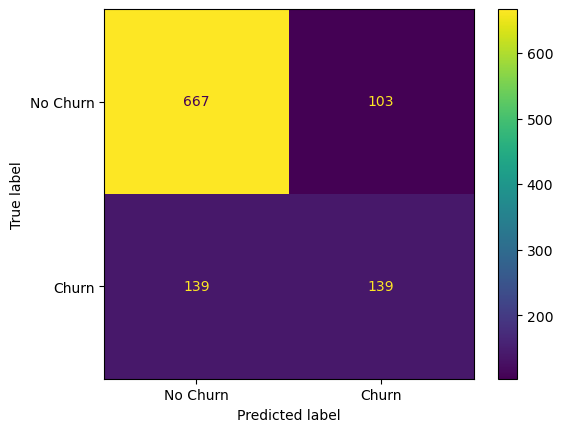

In [1447]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tree Model
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=16
)

# validacion
# ** test size por defecto es 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=16)

modelo = DecisionTreeClassifier(max_depth=5, random_state=16)
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_val)

matriz_confusion = confusion_matrix(y_val, y_previsto)

print(f"La precisión del modelo es: {precision_score(y_val, y_previsto)}")
print(f"La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}")
print(f"La exactitud (Accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}")
print(f"El F1-score del modelo es: {f1_score(y_val, y_previsto)}")

visualizacion = ConfusionMatrixDisplay(
    matriz_confusion, display_labels=["No Churn", "Churn"]
)

visualizacion.plot();

La precisión del modelo es: 0.6057142857142858
La sensibilidad (Recall) del modelo es: 0.4491525423728814
La exactitud (Accuracy) del modelo es: 0.77665544332211
El F1-score del modelo es: 0.5158150851581509


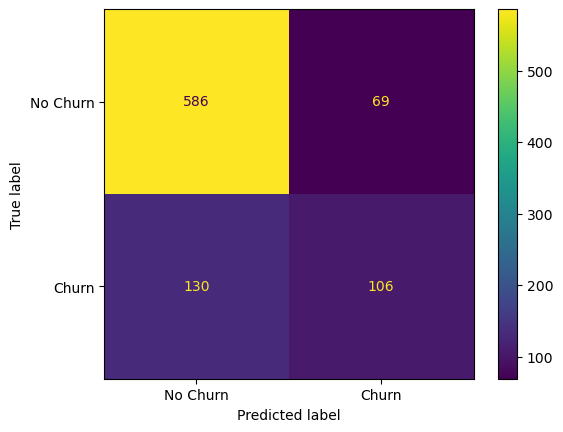

In [1448]:
from sklearn.ensemble import RandomForestClassifier

# FOREST Model
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=16
)

# validacion
# ** test size por defecto es 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=16)

modelo = RandomForestClassifier(max_depth=5, random_state=16)
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_val)

matriz_confusion = confusion_matrix(y_val, y_previsto)

print(f"La precisión del modelo es: {precision_score(y_val, y_previsto)}")
print(f"La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}")
print(f"La exactitud (Accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}")
print(f"El F1-score del modelo es: {f1_score(y_val, y_previsto)}")

visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No Churn', 'Churn'])
visualizacion.plot()

#### Resultados modelo Árbol de decisiones
- La precisión del modelo es: 0.5743801652892562
- La sensibilidad (Recall) del modelo es: 0.5
- La exactitud (Accuracy) del modelo es: 0.7690839694656488
- El F1-score del modelo es: 0.5346153846153846

#### Resultado modelo Random Forest
- La precisión del modelo es: 0.6057142857142858
- La sensibilidad (Recall) del modelo es: 0.4491525423728814
- La exactitud (Accuracy) del modelo es: 0.77665544332211
- El F1-score del modelo es: 0.5158150851581509

El desempeño de ambos modelo pareciera no ser muy distinto. Random Forest tiene mejores resultados con las métricas de precisión y exactitud, mientras que el árbol de decisiones lo supera en las restantes sensibilidad y F1.

Es importante notar que para evaluar estos modelos se usó la clase Churn desbalanceada, por lo que será mejor evaluarlos teniendo esto en cuenta.

Bajo este criterio, quizás sea práctico utilizar la métrica F1-score, que proporciona un equilibrio entre recall y precisión para casos en que las clases de la variable objetivo están desbalanceadas.

# Validación cruzada: comprobando overfitting o underfitting

In [1449]:
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=5, shuffle=True, random_state=16)

cv_resultados_tree = cross_validate(tree, X, y, cv=kf)

cv_resultados_forest = cross_validate(forest, X, y, cv=kf)
cv_resultados_forest

{'fit_time': array([0.07028913, 0.07086515, 0.07023883, 0.07324386, 0.07388401]),
 'score_time': array([0.00504494, 0.00455713, 0.00499582, 0.00511003, 0.0050571 ]),
 'test_score': array([0.75736325, 0.78511236, 0.78370787, 0.76685393, 0.78089888])}

In [1450]:
def show_cv_metrics(test_score):
    promedio = test_score.mean()
    desvio_std = test_score.std()

    return f"El intervalo de confianza es: [{promedio - 2*desvio_std}, {min(promedio+2*desvio_std,1)}]"

### Resultados Decision Tree Desbalanceado

In [1451]:
metricas = ["accuracy", "recall", "precision", "f1"]
# Puntaje TREE DESBALANCEADO
for metrica in metricas:
    print(f"Puntaje: {metrica}")
    cv_resultados = cross_validate(tree, X, y, cv=kf, scoring=metrica)
    print(show_cv_metrics(cv_resultados["test_score"]))

Puntaje: accuracy
El intervalo de confianza es: [0.7425668468519457, 0.7929674519645757]
Puntaje: recall
El intervalo de confianza es: [0.4853637635669126, 0.565970301371685]
Puntaje: precision
El intervalo de confianza es: [0.5039094546989125, 0.6285179075417777]
Puntaje: f1
El intervalo de confianza es: [0.4989520264353487, 0.590950257097617]


### Resultados Random Forest Desbalanceado

In [1452]:
# Puntaje FOREST DESBALANCEADO
for metrica in metricas:
    print(f"Puntaje: {metrica}")
    cv_resultados = cross_validate(forest, X, y, cv=kf, scoring=metrica)
    print(show_cv_metrics(cv_resultados["test_score"]))

Puntaje: accuracy
El intervalo de confianza es: [0.7530604002835117, 0.7965141147424113]
Puntaje: recall
El intervalo de confianza es: [0.35484701577747574, 0.5708104812703965]
Puntaje: precision
El intervalo de confianza es: [0.5077887883593006, 0.6944675865489511]
Puntaje: f1
El intervalo de confianza es: [0.4596974254301789, 0.5789119736728585]


In [1453]:
from sklearn.model_selection import StratifiedKFold

In [1454]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)
cv_resultados_forest = cross_validate(forest, X, y, cv=skf, scoring="recall")

show_cv_metrics(cv_resultados_forest["test_score"])

'El intervalo de confianza es: [0.33992659885218135, 0.5277982688726863]'

# Balanceando clases con oversampling

In [1455]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()

x_bal, y_bal = oversampling.fit_resample(X, y)

> Aplicamos técnicas de oversampling (SMOTE) para balancear las clases y mejorar la capacidad predictiva en la clase minoritaria.

In [1456]:
tree_bal = DecisionTreeClassifier(max_depth=5, random_state=16)
cv_resultados_tree_bal = cross_validate(tree_bal, x_bal, y_bal, cv=skf, scoring='recall')
show_cv_metrics(cv_resultados_tree_bal['test_score'])

'El intervalo de confianza es: [0.7825378842792309, 0.8283169899782094]'

In [1457]:
forest_bal = RandomForestClassifier(max_depth=5, random_state=16)
cv_resultados_forest_bal = cross_validate(
    forest_bal, x_bal, y_bal, cv=skf, scoring="recall"
)
show_cv_metrics(cv_resultados_forest_bal["test_score"])

'El intervalo de confianza es: [0.7750130194050677, 0.826671332469759]'

### Resultados Decision Tree

In [1458]:
# RESULTADO TREE BALANCEADO
for metrica in metricas:
    print(f"Puntaje: {metrica}")
    cv_resultados = cross_validate(tree_bal, x_bal, y_bal, cv=skf, scoring=metrica)
    print(show_cv_metrics(cv_resultados["test_score"]))

Puntaje: accuracy
El intervalo de confianza es: [0.7306591985070693, 0.7857827525467472]
Puntaje: recall
El intervalo de confianza es: [0.7825378842792309, 0.8283169899782094]
Puntaje: precision
El intervalo de confianza es: [0.7026022585768537, 0.7700153199689619]
Puntaje: f1
El intervalo de confianza es: [0.7466804228870277, 0.7917114444993948]


### Resultados Random Forest

In [1459]:
# RESULTADO FOREST BALANCEADO
for metrica in metricas:
    print(f"Puntaje: {metrica}")
    cv_resultados = cross_validate(forest_bal, x_bal, y_bal, cv=skf, scoring=metrica)
    print(show_cv_metrics(cv_resultados["test_score"]))

Puntaje: accuracy
El intervalo de confianza es: [0.7332536549587346, 0.785862238397682]
Puntaje: recall
El intervalo de confianza es: [0.7750130194050677, 0.826671332469759]
Puntaje: precision
El intervalo de confianza es: [0.7045916856085375, 0.7759199462708162]
Puntaje: f1
El intervalo de confianza es: [0.7484515398329996, 0.7898842760244764]


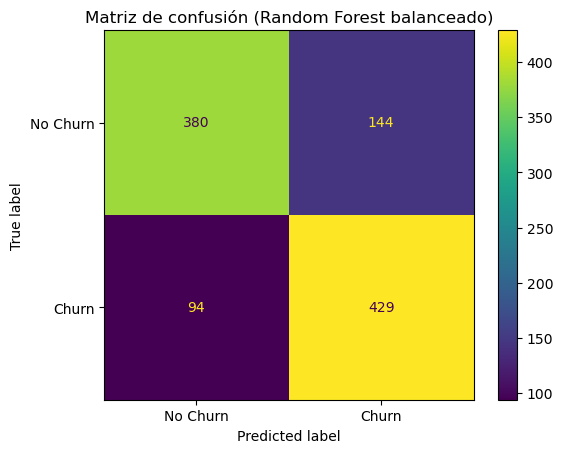

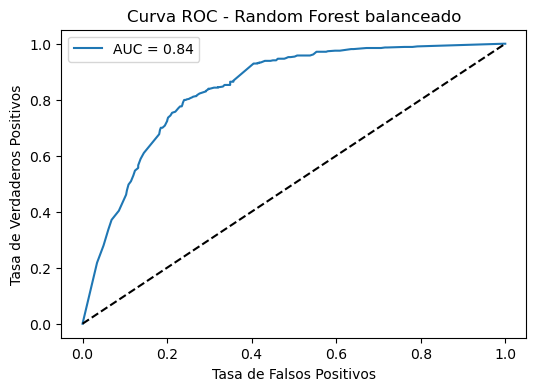

In [1460]:
# Matriz de confusión y curva ROC/AUC para el modelo Random Forest balanceado
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Predicción en validación cruzada (usando el último fold como ejemplo)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)
for train_idx, test_idx in skf.split(x_bal, y_bal):
    X_train_fold, X_test_fold = x_bal.iloc[train_idx], x_bal.iloc[test_idx]
    y_train_fold, y_test_fold = y_bal.iloc[train_idx], y_bal.iloc[test_idx]
    modelo = RandomForestClassifier(max_depth=5, random_state=16)
    modelo.fit(X_train_fold, y_train_fold)
    y_pred_fold = modelo.predict(X_test_fold)
    y_proba_fold = modelo.predict_proba(X_test_fold)[:,1]
    break  # Solo el primer fold para visualización
# Matriz de confusión
cm = confusion_matrix(y_test_fold, y_pred_fold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()
plt.title('Matriz de confusión (Random Forest balanceado)')
plt.show()

# Curva ROC/AUC
fpr, tpr, thresholds = roc_curve(y_test_fold, y_proba_fold)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest balanceado')
plt.legend()
plt.show()

### Comparando los resultados:

#### Clase Desbalanceada

| Modelo              | Accuracy        | Recall          | Precision       | F1-Score        |
|:-------------------:|:--------------:|:---------------:|:---------------:|:---------------:|
| Decision Tree       | 0.74 - 0.79    | 0.48 - 0.56     | 0.50 - 0.62     | 0.49 - 0.59     |
| Random Forest       | 0.75 - 0.79    | 0.35 - 0.57     | 0.50 - 0.69     | 0.50 - 0.69     |

#### Clase Balanceada

| Modelo              | Accuracy        | Recall          | Precision       | F1-Score        |
|:-------------------:|:--------------:|:---------------:|:---------------:|:---------------:|
| Decision Tree       | 0.73 - 0.78    | 0.78 - 0.82     | 0.70 - 0.77     | 0.74 - 0.79     |
| Random Forest       | 0.73 - 0.78    | 0.77 - 0.82     | 0.70 - 0.77     | 0.74 - 0.78     |

*Los valores corresponden al intervalo de confianza de las métricas obtenidas en validación cruzada (ver celdas de resultados para detalles).*


### Validando con Pipeline

In [1461]:
from imblearn.pipeline import Pipeline as imbpipeline

pipeline = imbpipeline([("oversample", SMOTE()), ("arbol", tree)])
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring="recall")

for metrica in metricas:
    print(f"Puntaje: {metrica}")
    cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring="recall")
    print(show_cv_metrics(cv_resultados["test_score"]))

Puntaje: accuracy
El intervalo de confianza es: [0.7677302672721357, 0.8195713200294518]
Puntaje: recall
El intervalo de confianza es: [0.7560879222617638, 0.8417956756218341]
Puntaje: precision
El intervalo de confianza es: [0.7634961337369905, 0.832271062030205]
Puntaje: f1
El intervalo de confianza es: [0.7642664577212165, 0.8188023253475664]


In [1462]:
pipeline = imbpipeline([("oversample", SMOTE()), ("arbol", forest)])
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring="recall")

for metrica in metricas:
    print(f"Puntaje: {metrica}")
    cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring="recall")
    print(show_cv_metrics(cv_resultados["test_score"]))

Puntaje: accuracy
El intervalo de confianza es: [0.7425408641701378, 0.8278295062002327]
Puntaje: recall
El intervalo de confianza es: [0.7425408641701378, 0.8278295062002324]
Puntaje: precision
El intervalo de confianza es: [0.7372451348030042, 0.8352416376837681]
Puntaje: f1
El intervalo de confianza es: [0.7571482566901251, 0.808989309447441]


# Importancia de las variables

> Analizamos la importancia de las variables para identificar los factores que más influyen en la cancelación de clientes.

In [1463]:
importances = forest.feature_importances_

feature_importances = pd.DataFrame(
    {"Features": X.columns, "Importances": (importances * 100).round(2)}
).sort_values("Importances", ascending=False)
feature_importances

,Features,Importances
0,Contract_Month-to-month,32.38
2,TechSupport_No,21.22
1,OnlineSecurity_No,18.16
3,InternetService_Fiber optic,11.29
4,PaymentMethod_Electronic check,9.59
5,OnlineBackup_No,5.04
6,DeviceProtection_No,2.32


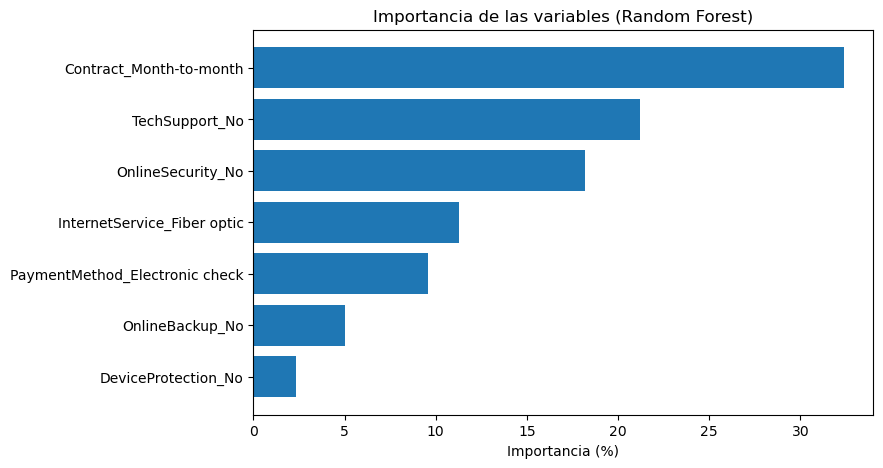

In [1464]:
# Visualización de la importancia de variables (barplot)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(feature_importances['Features'], feature_importances['Importances'])
plt.xlabel('Importancia (%)')
plt.title('Importancia de las variables (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

In [1465]:
from sklearn.ensemble import RandomForestRegressor

resultados = pd.DataFrame(index=["RMSE", "MAE", "R2"])
model_features = RandomForestRegressor(max_depth=5, random_state=16)

ct_features = [i if i != 0 else 1 for i in range(0, 35, 5)]
for i in ct_features:
    selected_features = feature_importances["Features"].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_features.fit(X_train_sel, y_train)
    y_pred = model_features.predict(X_test_sel)

    metricas = calcular_regresion(y_test, y_pred)

    resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,0.4153,0.3912,0.3910,0.3910,0.3910,0.3910,0.3910
MAE,0.3377,0.3029,0.3019,0.3019,0.3019,0.3019,0.3019
R2,0.1156,0.2154,0.2160,0.2160,0.2160,0.2160,0.2160


Se puede ver que luego de las 10 features los resultados dejan de cambiar, se podría concluir que no vale la pena utilizar más que esa cantidad.

Se puede profundizar un poco más para encontrar el punto ideal:

In [1466]:
resultados = pd.DataFrame(index=["RMSE", "MAE", "R2"])
model_features = RandomForestRegressor(max_depth=5, random_state=16)

ct_features = range(5, 11)

for i in ct_features:
    selected_features = feature_importances["Features"].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_features.fit(X_train_sel, y_train)
    y_pred = model_features.predict(X_test_sel)

    metricas = calcular_regresion(y_test, y_pred)

    resultados[i] = list(metricas.values())

resultados

,5,6,7,8,9,10
RMSE,0.3912,0.3911,0.3910,0.3910,0.3910,0.3910
MAE,0.3029,0.3021,0.3019,0.3019,0.3019,0.3019
R2,0.2154,0.2156,0.2160,0.2160,0.2160,0.2160


- RMSE: hay una mejora yendo de 5 a 7 features, estancándose en esta última cantidad.
- MAE: también se estanca en 7 features
- R2: Mismo comportamiento, se estanca en 7 features

Podría concluir que la cantidad ideal de features sería de 7 (ordenadas de mayor a menor importancia).

# Conjunto de datos optimizado

In [1467]:
selected_features = feature_importances['Features'].values[:7]
X_selected_features = X[selected_features]
X_selected_features

,Contract_Month-to-month,TechSupport_No,OnlineSecurity_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No
1354,0,1,1,1,1,1,0
6528,1,1,1,0,0,1,1
6490,0,1,0,0,0,0,1
331,1,0,0,0,0,0,0
65,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...
197,1,1,0,0,1,1,1
3538,1,1,1,1,0,1,1
3177,1,1,1,1,0,0,1
1251,1,0,0,0,0,0,0


In [1468]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=16)

# Optimizando el modelo

In [1469]:
param_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [2, 4, 6],
    "n_estimators": [100, 150, 200],
}

from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=16)
model_grid = GridSearchCV(
    RandomForestRegressor(random_state=16), param_grid=param_grid, scoring="r2", cv=cv
)

model_grid.fit(X_train, y_train)

model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [1470]:
y_pred = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_pred)
metricas_model_grid

{'RMSE': 0.4026, 'MAE': 0.3053, 'R2': 0.2387}

In [1471]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,5,6,7,8,9,10,modelo_grid
RMSE,0.3912,0.3911,0.3910,0.3910,0.3910,0.3910,0.4026
MAE,0.3029,0.3021,0.3019,0.3019,0.3019,0.3019,0.3053
R2,0.2154,0.2156,0.2160,0.2160,0.2160,0.2160,0.2387


# Resumen y hallazgos principales
- Las variables más influyentes en la cancelación de clientes son el tipo de contrato, servicios de seguridad y soporte, y el método de pago electrónico.
- El desbalance de clases afecta la capacidad predictiva, por lo que el uso de técnicas de balanceo como SMOTE mejora el recall y el F1-score.
- Los modelos Random Forest y Decision Tree balanceados presentan un desempeño similar, siendo el Random Forest ligeramente superior en precisión y exactitud.
- La métrica F1-score es la más adecuada para evaluar el modelo en este contexto de desbalance.

# Propuestas de Estrategias para Mejorar la Retención de Clientes

A partir de los resultados obtenidos y el análisis de los principales factores que influyen en la cancelación de clientes, se proponen las siguientes estrategias para mejorar la retención:


### 1. Incentivar contratos de mayor duración

- El tipo de contrato "Month-to-month" es el principal predictor de cancelación. Se recomienda ofrecer incentivos (descuentos, beneficios exclusivos, meses gratis) para que los clientes migren a contratos anuales o de mayor plazo.


### 2. Mejorar los servicios de seguridad y soporte

- La falta de servicios como Online Security y Tech Support está fuertemente asociada a la cancelación. Se sugiere comunicar mejor el valor de estos servicios, ofrecer pruebas gratuitas o paquetes promocionales, y facilitar su contratación.


### 3. Optimizar la experiencia de clientes con Internet de fibra óptica

- Los usuarios de fibra óptica presentan mayor propensión a cancelar. Es clave monitorear la calidad del servicio, resolver incidencias rápidamente y ofrecer atención personalizada a este segmento o incluso considerar mejorar la infraestructura subyacente.


### 4. Revisar y mejorar el método de pago electrónico

- El pago mediante Electronic Check se asocia a mayor churn. Se recomienda promover métodos de pago automáticos (tarjeta, débito automático, Paypal) y simplificar el proceso de pago para reducir fricciones.


### 5. Programas de fidelización y retención proactiva

- Implementar alertas tempranas para clientes con alto riesgo de cancelación (por ejemplo, quienes cumplen ciertas condiciones detectadas por el modelo). Ofrecerles atención personalizada, encuestas de satisfacción y beneficios exclusivos.


### 6. Educación y comunicación

- Informar a los clientes sobre los beneficios de los servicios adicionales y las ventajas de contratos de mayor duración. Utilizar campañas de email, llamadas o mensajes personalizados.